In [110]:
import pandas as pd

In [111]:
dataFrame = pd.read_excel("bisiklet_fiyatlari.xlsx")

In [112]:
dataFrame.head()

,Fiyat,BisikletOzellik1,BisikletOzellik2
0,807.673876,1749.628226,1749.590668
1,959.227520,1748.007826,1751.824206
2,718.020033,1750.122967,1747.977026
3,945.668885,1749.916440,1750.771646
4,955.542968,1750.780519,1750.592430


In [113]:
import seaborn as sbn
import matplotlib.pyplot as plt

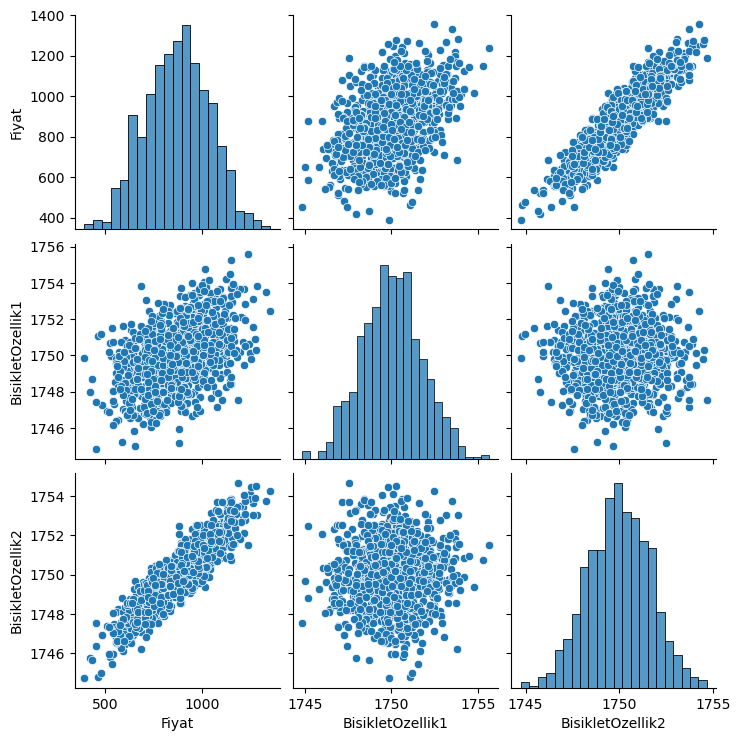

In [114]:
sbn.pairplot(dataFrame)

## veriyi test / train olarak ikiye ayırmak

In [115]:
from sklearn.model_selection import train_test_split

In [116]:
# train_test_split

>>> X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.33, random_state=42)

In [117]:
# y = wx + b
# y -> label

y = dataFrame["Fiyat"].values

# x -> feature (özellik)
x = dataFrame[["BisikletOzellik1", "BisikletOzellik2"]].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 15)

veri rastgele bölündü

In [118]:
x_train.shape

(670, 2)

670 veri trainin içine geldi. %99 u


In [119]:
x_test.shape

(330, 2)

330 veri testin içine geldi. % 33 ü.
x matris, y değil

In [120]:
y_train.shape

(670,)

In [121]:
y_test.shape

(330,)

## scaling (boyut değiştirmek)

In [122]:
from sklearn.preprocessing import MinMaxScaler

In [123]:
scaler = MinMaxScaler()

MinMaxScaler sınıfından obje oluşturuldu

In [124]:
scaler.fit(x_train)

MinMaxScaler()

In [125]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [126]:
x_train

array([[0.3177906 , 0.64341466],
       [0.61991638, 0.89583174],
       [0.53950097, 0.0980286 ],
       ...,
       [0.2352117 , 0.52644765],
       [0.7576794 , 0.19157421],
       [0.4292982 , 0.16530301]])

veriler 0 - 1 arasına getirildi

In [127]:
import tensorflow as tf

In [128]:
from keras.models import Sequential
from keras.layers import Dense


In [129]:
model = Sequential()

model.add(Dense(4, activation = "relu"))
model.add(Dense(4, activation = "relu"))
model.add(Dense(4, activation = "relu"))

model.add(Dense(1))  # çıktı katmanı 1 nöronlu

model.compile(optimizer = "rmsprop", loss = "mse")       # işlemleri birleştirip çalıştırmaya hazır hale getirir.

4 tane nöron alacak. 3 kere yazdım aynı şeyi. 3 katman oldu

## modeli eğitmek - training

In [130]:
model.fit(x_train, y_train, epochs = 250 )

Epoch 1/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 454us/step - loss: 784994.2500
Epoch 2/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step - loss: 803185.0000
Epoch 3/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 533us/step - loss: 785109.9375
Epoch 4/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 468us/step - loss: 798155.3750
Epoch 5/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step - loss: 795219.6250
Epoch 6/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step - loss: 790611.6875
Epoch 7/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 833us/step - loss: 787702.8750
Epoch 8/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step - loss: 799959.5000
Epoch 9/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step - loss: 790957.1250
Epoch 10/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step - loss: 786754.1875
Epoch 11/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 481us/step - loss: 812622.6250
Epoch 12/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 443us/step - loss: 777153.5000
Epoch 13/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 649us/step - loss: 790057.3750
Epoch 14/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 610u

In [131]:
loss = model.history.history["loss"]

<Axes: >

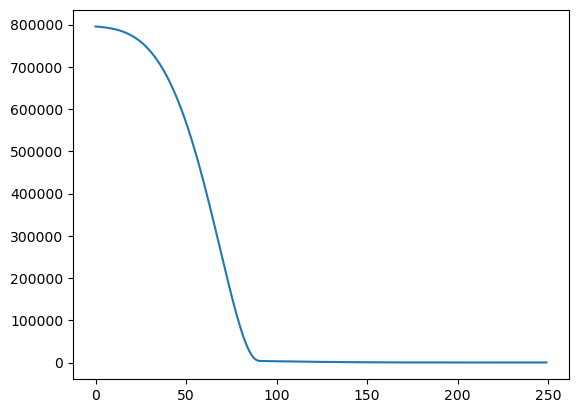

In [134]:
sbn.lineplot(x = range(len(loss)), y = loss)

In [137]:
model.evaluate(x_train, y_train)

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 706us/step - loss: 71.3247


73.24269104003906

In [138]:
trainLoss = model.evaluate(x_train, y_train, verbose = 0)

In [140]:
testLoss = model.evaluate(x_test, y_test, verbose = 0)

In [141]:
trainLoss

73.24269104003906

In [142]:
testLoss

78.1905288696289

In [145]:
testTahminleri = model.predict(x_test)
 # x_test i vericez y_test i tahmin edecek

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [146]:
testTahminleri

array([[1077.3698 ],
       [ 623.29224],
       [ 875.6385 ],
       [ 893.718  ],
       [ 898.9735 ],
       [ 450.89536],
       [ 930.66455],
       [ 990.96454],
       [ 940.76434],
       [1016.3308 ],
       [ 750.43634],
       [ 917.42346],
       [ 947.0137 ],
       [1054.2721 ],
       [1121.0696 ],
       [ 681.0322 ],
       [1126.5293 ],
       [ 650.36487],
       [1154.1566 ],
       [ 886.0692 ],
       [ 892.33826],
       [ 716.2892 ],
       [ 456.24313],
       [ 611.4483 ],
       [ 834.5294 ],
       [1090.7979 ],
       [ 713.25195],
       [ 756.3677 ],
       [ 872.97314],
       [ 770.1072 ],
       [ 450.68253],
       [ 782.572  ],
       [ 727.7648 ],
       [ 646.2601 ],
       [ 886.24384],
       [ 843.3065 ],
       [1035.3026 ],
       [1022.3406 ],
       [ 844.4504 ],
       [ 861.7252 ],
       [ 756.6393 ],
       [1174.1658 ],
       [1097.1912 ],
       [1087.4012 ],
       [ 872.72046],
       [ 596.0792 ],
       [1145.309  ],
       [ 972.

In [147]:
tahminDataFrame = pd.DataFrame(y_test, columns = ["Gerçek Fiyat"])

In [150]:
# testTahminleri dizisini series yapalım
testTahminleri = pd.Series(testTahminleri.reshape(330,))

In [151]:
testTahminleri

0      1077.369751
1       623.292236
2       875.638489
3       893.718018
4       898.973511
          ...     
325    1013.123169
326     790.289673
327     765.470520
328    1167.199463
329     802.218872
Length: 330, dtype: float32

In [153]:
tahminDataFrame = pd.concat([tahminDataFrame, testTahminleri], axis = 1)

In [154]:
tahminDataFrame

,Gerçek Fiyat,0
0,1081.652164,1077.369751
1,622.675990,623.292236
2,889.356810,875.638489
3,902.826733,893.718018
4,897.662404,898.973511
...,...,...
325,1028.438035,1013.123169
326,789.934950,790.289673
327,758.490486,765.470520
328,1172.871659,1167.199463


In [155]:
tahminDataFrame.columns = ["Gerçek Fiyat", "Tahmin Edilen Fiyat"]

In [156]:
tahminDataFrame

,Gerçek Fiyat,Tahmin Edilen Fiyat
0,1081.652164,1077.369751
1,622.675990,623.292236
2,889.356810,875.638489
3,902.826733,893.718018
4,897.662404,898.973511
...,...,...
325,1028.438035,1013.123169
326,789.934950,790.289673
327,758.490486,765.470520
328,1172.871659,1167.199463


<Axes: xlabel='Gerçek Fiyat', ylabel='Tahmin Edilen Fiyat'>

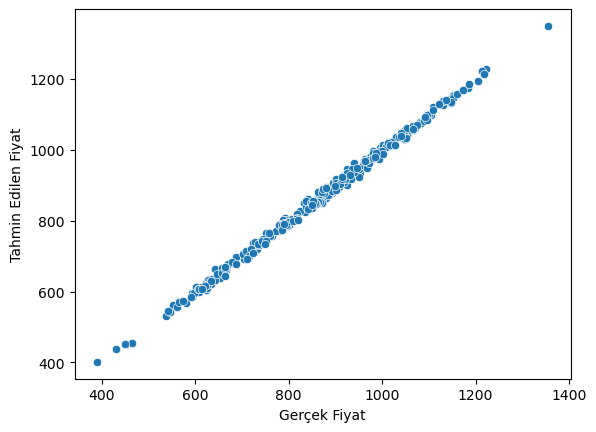

In [158]:
sbn.scatterplot(x = "Gerçek Fiyat", y = "Tahmin Edilen Fiyat", data = tahminDataFrame)

In [159]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [160]:
mean_absolute_error(tahminDataFrame["Gerçek Fiyat"], tahminDataFrame["Tahmin Edilen Fiyat"])

7.085703979428265

hata oranı

In [161]:
dataFrame.describe()

,Fiyat,BisikletOzellik1,BisikletOzellik2
count,1000.000000,1000.000000,1000.000000
mean,872.677801,1750.024800,1749.964733
std,164.124504,1.704531,1.659578
min,390.856887,1744.852108,1744.742389
25%,757.795031,1748.831119,1748.803186
50%,879.168705,1750.017350,1750.003926
75%,988.612778,1751.115765,1751.129414
max,1355.213745,1755.613884,1754.666038


mean	872.677801	 ortalamada 7 liralık fiyat hatası var

In [162]:
yeniBisikletOzellikleri = [[1760, 1758]]

In [163]:
yeniBisikletOzellikleri = scaler.transform(yeniBisikletOzellikleri)

In [165]:
model.predict(yeniBisikletOzellikleri)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


array([[1983.6627]], dtype=float32)

In [167]:
from keras.models import load_model

In [169]:
model.save("bisiklet_modeli.keras")

modeli kaydettik

In [170]:
sonradanCagirilanModel = load_model("bisiklet_modeli.keras")

In [171]:
sonradanCagirilanModel.predict(yeniBisikletOzellikleri)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


array([[1983.6627]], dtype=float32)